In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
states = pd.read_csv('USArrests.csv',index_col=0)
states.head()

,Murder,Assault,UrbanPop,Rape
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5
California,9.0,276,91,40.6


In [17]:
#importing scale() which will scale to a mean of 0 and an std dev of 1 by default
from sklearn.preprocessing import scale

invX = states.T
invX

,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,Florida,Georgia,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
Murder,13.2,10.0,8.1,8.8,9.0,7.9,3.3,5.9,15.4,17.4,...,3.8,13.2,12.7,3.2,2.2,8.5,4.0,5.7,2.6,6.8
Assault,236.0,263.0,294.0,190.0,276.0,204.0,110.0,238.0,335.0,211.0,...,86.0,188.0,201.0,120.0,48.0,156.0,145.0,81.0,53.0,161.0
UrbanPop,58.0,48.0,80.0,50.0,91.0,78.0,77.0,72.0,80.0,60.0,...,45.0,59.0,80.0,80.0,32.0,63.0,73.0,39.0,66.0,60.0
Rape,21.2,44.5,31.0,19.5,40.6,38.7,11.1,15.8,31.9,25.8,...,12.8,26.9,25.5,22.9,11.2,20.7,26.2,9.3,10.8,15.6


In [19]:
#creating new, scaled df
X = pd.DataFrame(scale(invX), index=invX.index, columns=invX.columns)
X.head()

,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,Florida,Georgia,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
Murder,-0.761779,-0.812171,-0.841239,-0.803097,-0.919877,-0.995197,-1.050586,-0.828103,-0.777219,-0.782801,...,-1.027272,-0.847307,-0.901903,-1.153101,-1.183528,-0.925033,-1.075386,-0.929245,-1.131579,-0.882641
Assault,1.701565,1.712920,1.685792,1.694049,1.661386,1.633196,1.331934,1.667227,1.702435,1.695536,...,1.523838,1.681234,1.629071,1.372585,1.379384,1.622910,1.536663,1.565306,0.738309,1.635458
UrbanPop,-0.266457,-0.432908,-0.205724,-0.235313,-0.127130,-0.055624,0.595072,-0.117456,-0.276013,-0.237465,...,0.251387,-0.184795,0.002688,0.507624,0.484043,0.016410,0.202851,0.173923,1.220622,-0.013881
Rape,-0.673329,-0.467840,-0.638829,-0.655639,-0.614379,-0.582375,-0.876419,-0.721668,-0.649202,-0.675270,...,-0.747953,-0.649132,-0.729856,-0.727108,-0.679899,-0.714288,-0.664127,-0.809984,-0.827351,-0.738937


In [12]:
#inverting DF
Xinv = X.T
Xinv

,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,Florida,Georgia,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
Murder,1.255179,0.513019,0.072361,0.234708,0.281093,0.025976,-1.040880,-0.437875,1.765415,2.229265,...,-0.924918,1.255179,1.139217,-1.064073,-1.295998,0.165131,-0.878533,-0.484260,-1.203228,-0.229142
Assault,0.790787,1.118060,1.493817,0.233212,1.275635,0.402909,-0.736484,0.815030,1.990786,0.487757,...,-1.027393,0.208970,0.366545,-0.615272,-1.487999,-0.178909,-0.312242,-1.087999,-1.427393,-0.118303
UrbanPop,-0.526195,-1.224067,1.009122,-1.084492,1.776781,0.869548,0.799761,0.450825,1.009122,-0.386621,...,-1.433428,-0.456408,1.009122,1.009122,-2.340661,-0.177259,0.520612,-1.852151,0.032102,-0.386621
Rape,-0.003451,2.509424,1.053466,-0.186794,2.088814,1.883901,-1.092723,-0.585834,1.150530,0.492653,...,-0.909380,0.611287,0.460298,0.179892,-1.081938,-0.057376,0.535792,-1.286851,-1.125078,-0.607404


In [20]:
#running PCA on inv
from sklearn.decomposition import PCA
pca = PCA()
usarrests_loadings = pd.DataFrame(pca.fit(X).components_.T, index=X.columns, columns=['PC1', 'PC2', 'PC3', 'PC4'])
display(usarrests_loadings)

,PC1,PC2,PC3,PC4
Alabama,0.142400,-0.128388,-0.102883,-0.950218
Alaska,0.138414,-0.172641,0.311589,0.127170
Arizona,0.143731,-0.107646,0.040963,0.045641
Arkansas,0.143136,-0.117757,-0.028421,0.022565
California,0.144903,-0.081592,0.165143,0.009919
Colorado,0.145494,-0.057429,0.298358,-0.053768
Connecticut,0.141517,0.138934,-0.198128,0.028142
Delaware,0.144901,-0.082986,-0.120385,0.035229
Florida,0.142300,-0.130426,-0.043982,0.045182
Georgia,0.143013,-0.119255,-0.084396,0.025604


In [21]:
#getting pca scores for each observation
usarrests_score = pd.DataFrame(pca.fit_transform(X), index =X.index, columns=['PC1','PC2','PC3','PC4'])
display(usarrests_score)

,PC1,PC2,PC3,PC4
Murder,-6.672757,-1.214794,-0.315450,1.133607e-15
Assault,10.719942,-1.352284,-0.013904,1.133607e-15
UrbanPop,0.985723,3.208411,-0.049557,1.133607e-15
Rape,-5.032908,-0.641334,0.378911,1.133607e-15


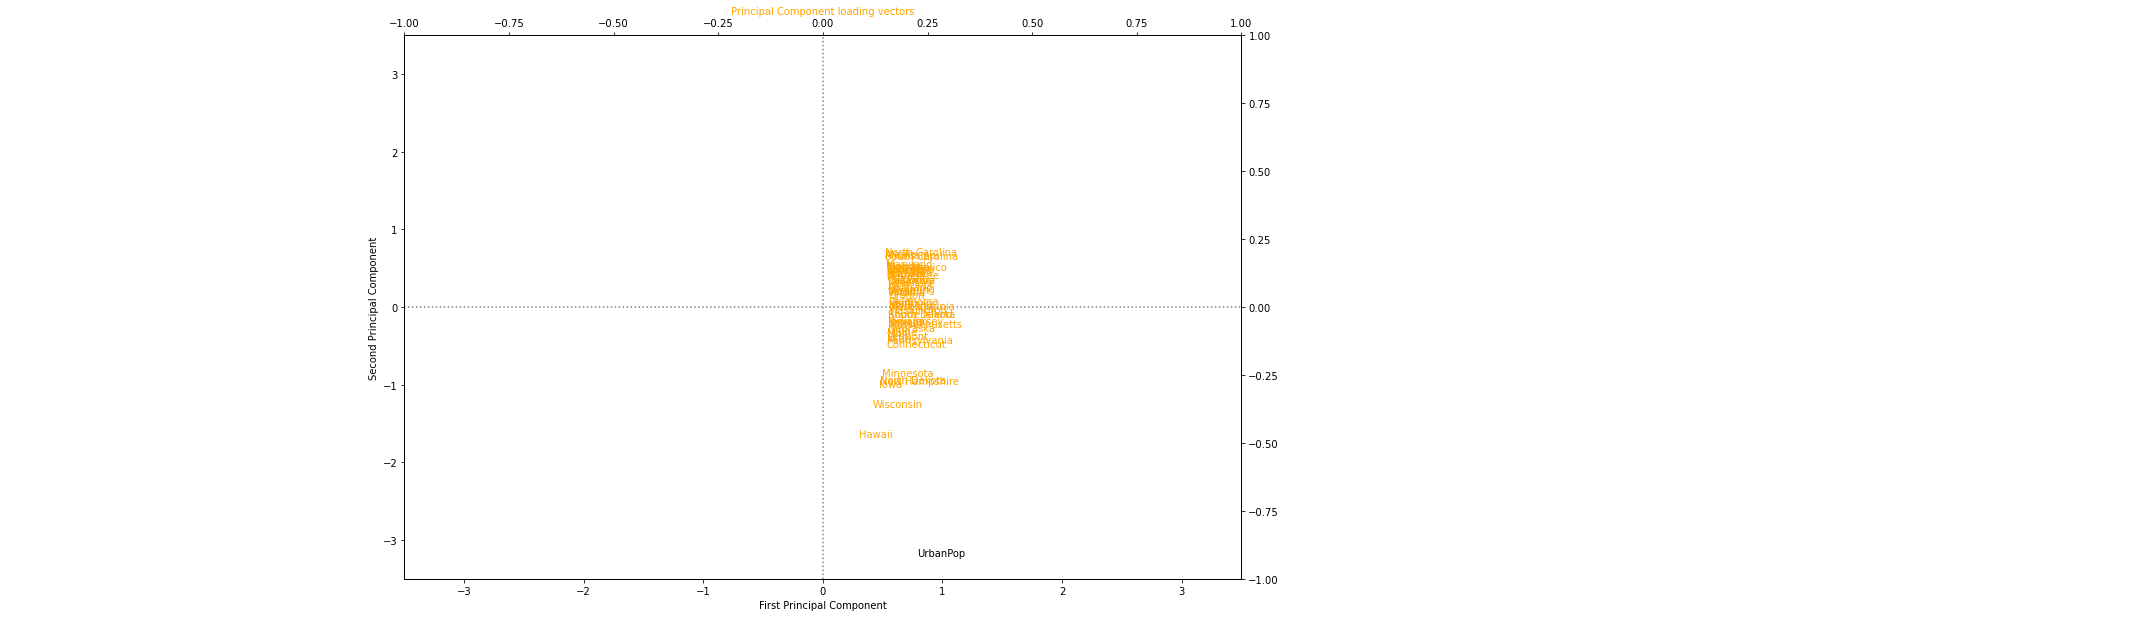

In [22]:
#setting the size
fig, ax1 = plt.subplots(figsize=(15,10))

#setting the axes
ax1.set_xlim(-3.5,3.5)
ax1.set_ylim(-3.5,3.5)

#plotting Principal Components 1 and 2
#annotate is for plotting text, first arg is text, second in parens is coordinates(x,y)
for i in usarrests_score.index:
    ax1.annotate(i, (usarrests_score.PC1.loc[i],-usarrests_score.PC2.loc[i]), ha='center')
    
#plotting center axis reference llines
ax1.hlines(0,-3.5,3.5, linestyles='dotted', colors='grey')
ax1.vlines(0,-3.5,3.5, linestyles='dotted',colors='grey')

#setting axes labels
ax1.set_xlabel('First Principal Component')
ax1.set_ylabel('Second Principal Component')

##plot second set of axes for the loading vectors
ax2 = ax1.twinx().twiny()
#setting limits on 2nd pair axes
ax2.set_ylim(-1,1)
ax2.set_xlim(-1,1)
ax2.tick_params(axis='y', colors='orange')
ax2.set_xlabel('Principal Component loading vectors', color='orange')

#Plot labels for vectors, Variable 'a' is a small offset parametrer to separate arrow tip and text
a =1.07
for i in usarrests_loadings[['PC1','PC2']].index:
    ax2.annotate(i,(usarrests_loadings.PC1.loc[i]*a,-usarrests_loadings.PC2.loc[i]*a),color='orange')
    
